## Importing the libraries 

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [2]:
data = pd.read_csv('medical_insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


## Splitting into categorical and numerical variables

In [3]:
categorical = [var for var in data.columns if data[var].dtype == 'O']
data[categorical].head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [4]:
numerical = [var for var in data.columns if data[var].dtype != 'O']
data[numerical].head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


## Checking OLS assumption of linearity 

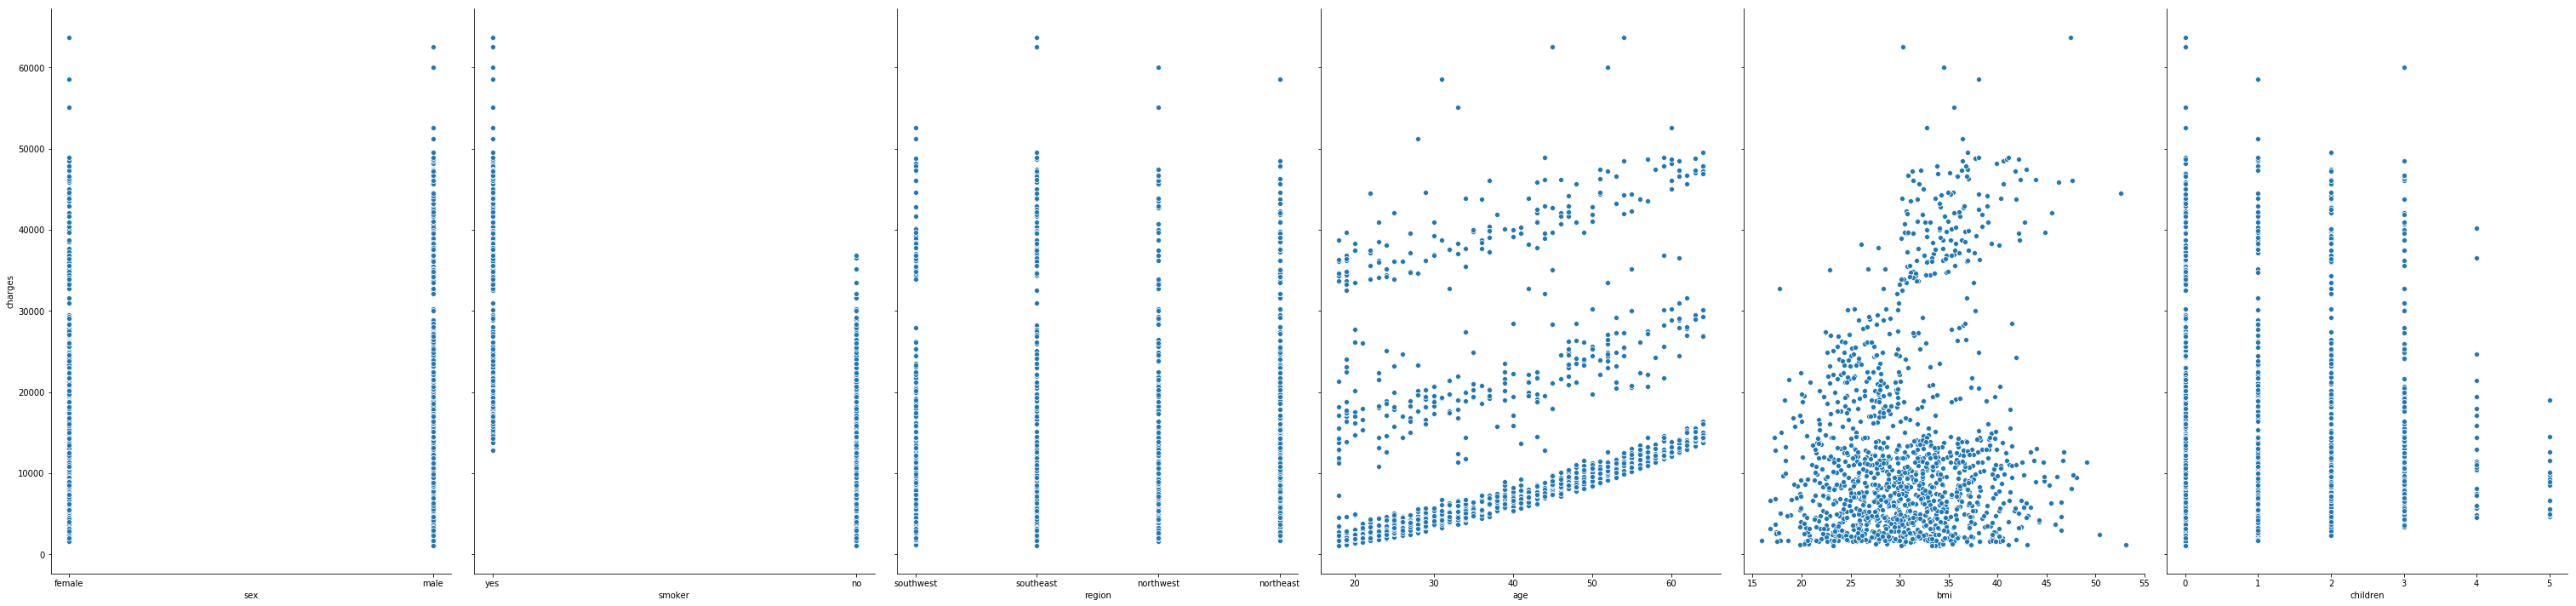

In [5]:
p = sns.pairplot(data, x_vars = ['sex','smoker','region','age','bmi','children'], y_vars = 'charges', size = 10, aspect = 0.7)

## Checking OLS assumption of multicollinearity

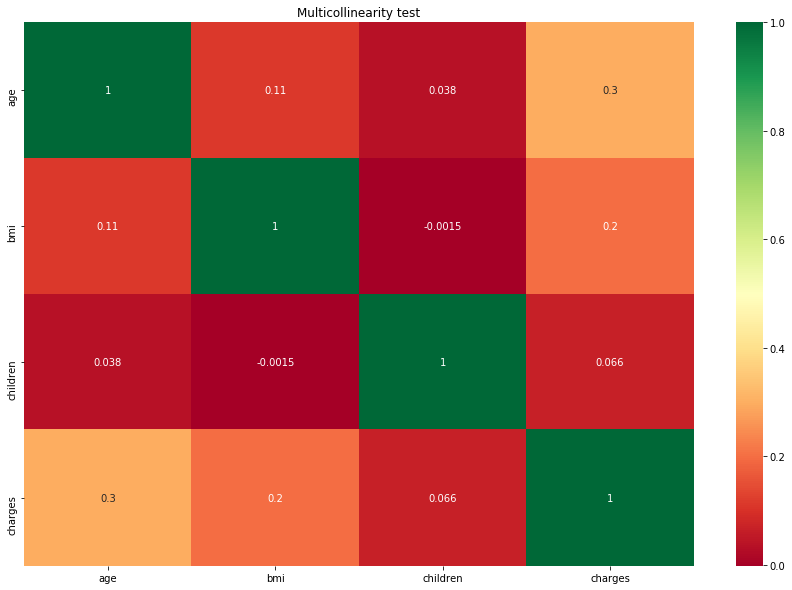

In [6]:
plt.figure(figsize =(15,10))
plt.title('Multicollinearity test')
sns.heatmap(data.corr(), annot = True, cmap = 'RdYlGn')
plt.show()

## Checking missing values 

In [7]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## No missing values in the data

## Checking outliers

In [8]:
data.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


## BMI column has outliers so we will visualize and treat them 

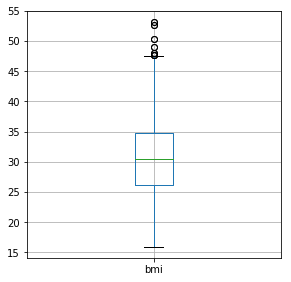

In [9]:
plt.figure(figsize = (10,10))
plt.title('Outliers')

plt.subplot(2,2,1)
fig = data.boxplot(column = 'bmi')

plt.show()

## Checking skewness of BMI column

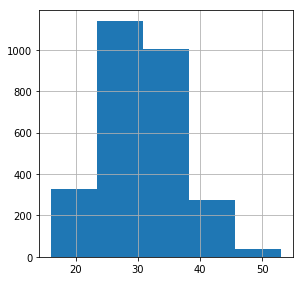

In [10]:
plt.figure(figsize=(10,10))
plt.title('Skewness')

plt.subplot(2,2,1)
fig = data.bmi.hist(bins = 5)

## Finding IQR and capping/cupping outliers

In [11]:
IQR = data.bmi.quantile(0.75) - data.bmi.quantile(0.25)
lower_fence = data.bmi.quantile(0.25) - (IQR * 3)
upper_fence = data.bmi.quantile(0.75) + (IQR * 3)
print(f"outlier values are <{lower_fence} and > {upper_fence}")

outlier values are <0.5699999999999861 and > 60.420000000000016


In [12]:
#capping
data['bmi'] = np.where(data['bmi']>60,60,data['bmi'])

In [13]:
data.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


## Splitting into dependent and independent features then training and testing set

In [14]:
y = data.iloc[:,6]

In [15]:
x = data.iloc[:,:6]

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 42, test_size = 0.2)

## Encoding categorical variables

In [17]:
x_train = pd.get_dummies(x_train, columns = ['sex','smoker','region'])
x_test = pd.get_dummies(x_test, columns =['sex','smoker','region'])

In [18]:
x_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1864,21,36.850,0,0,1,1,0,0,0,1,0
1997,38,34.800,2,1,0,1,0,0,0,0,1
1336,21,25.800,0,1,0,1,0,0,0,0,1
655,52,25.300,2,1,0,0,1,0,0,1,0
261,20,26.840,1,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1638,54,34.210,2,0,1,0,1,0,0,1,0
1095,18,31.350,4,1,0,1,0,1,0,0,0
1130,39,23.870,5,1,0,1,0,0,0,1,0
1294,58,25.175,0,0,1,1,0,1,0,0,0


## Model Training

In [19]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(x_train,y_train)

RandomForestRegressor()

In [20]:
y_pred1 = rf_regressor.predict(x_test)
np.set_printoptions(precision = 2)
comb = np.column_stack((y_pred1, y_test))
print(comb)

[[ 9497.87  8988.16]
 [28274.43 28101.33]
 [12569.42 12032.33]
 ...
 [34721.48 34838.87]
 [ 6354.21  6186.13]
 [11208.63  9722.77]]


## Model Evaluation 

In [21]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
n = len(y_test)  
p = x_test.shape[1]  


def regression_result(y_pred1, y_test):
    explained_variance = metrics.explained_variance_score(y_pred1, y_test)
    r2 = metrics.r2_score(y_pred1, y_test)
    mean_absolute_error = metrics.mean_absolute_error(y_pred1, y_test)
    
    print('f R2 =',r2)
    print('f explained variance = ',explained_variance)
    print('f mean absolute error = ',mean_absolute_error)
    print('f Adjusted R2 =', 1 - (1 - r2) * (n - 1) / (n - p - 1) )

In [22]:
regression_result(y_pred1, y_test)

f R2 = 0.9454251235304404
f explained variance =  0.9454277637409131
f mean absolute error =  1298.9479076663233
f Adjusted R2 = 0.9443195551305046


## K-fold cross validation

In [30]:
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(rf_regressor, x_train, y_train, cv = 5, scoring = 'r2')
print('Cross validatd core is ', cross_val)

Cross validatd core is  [0.93 0.95 0.92 0.95 0.9 ]
